# K-Means Clustering


Let's work through an example of unsupervised learning - clustering customer data.

## Goal:

When working with unsupervised learning methods, its usually important to lay out a general goal. In our case, let's attempt to find reasonable clusters of customers for marketing segmentation and study. What we end up doing with those clusters would depend **heavily** on the domain itself, in this case, marketing.

----

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


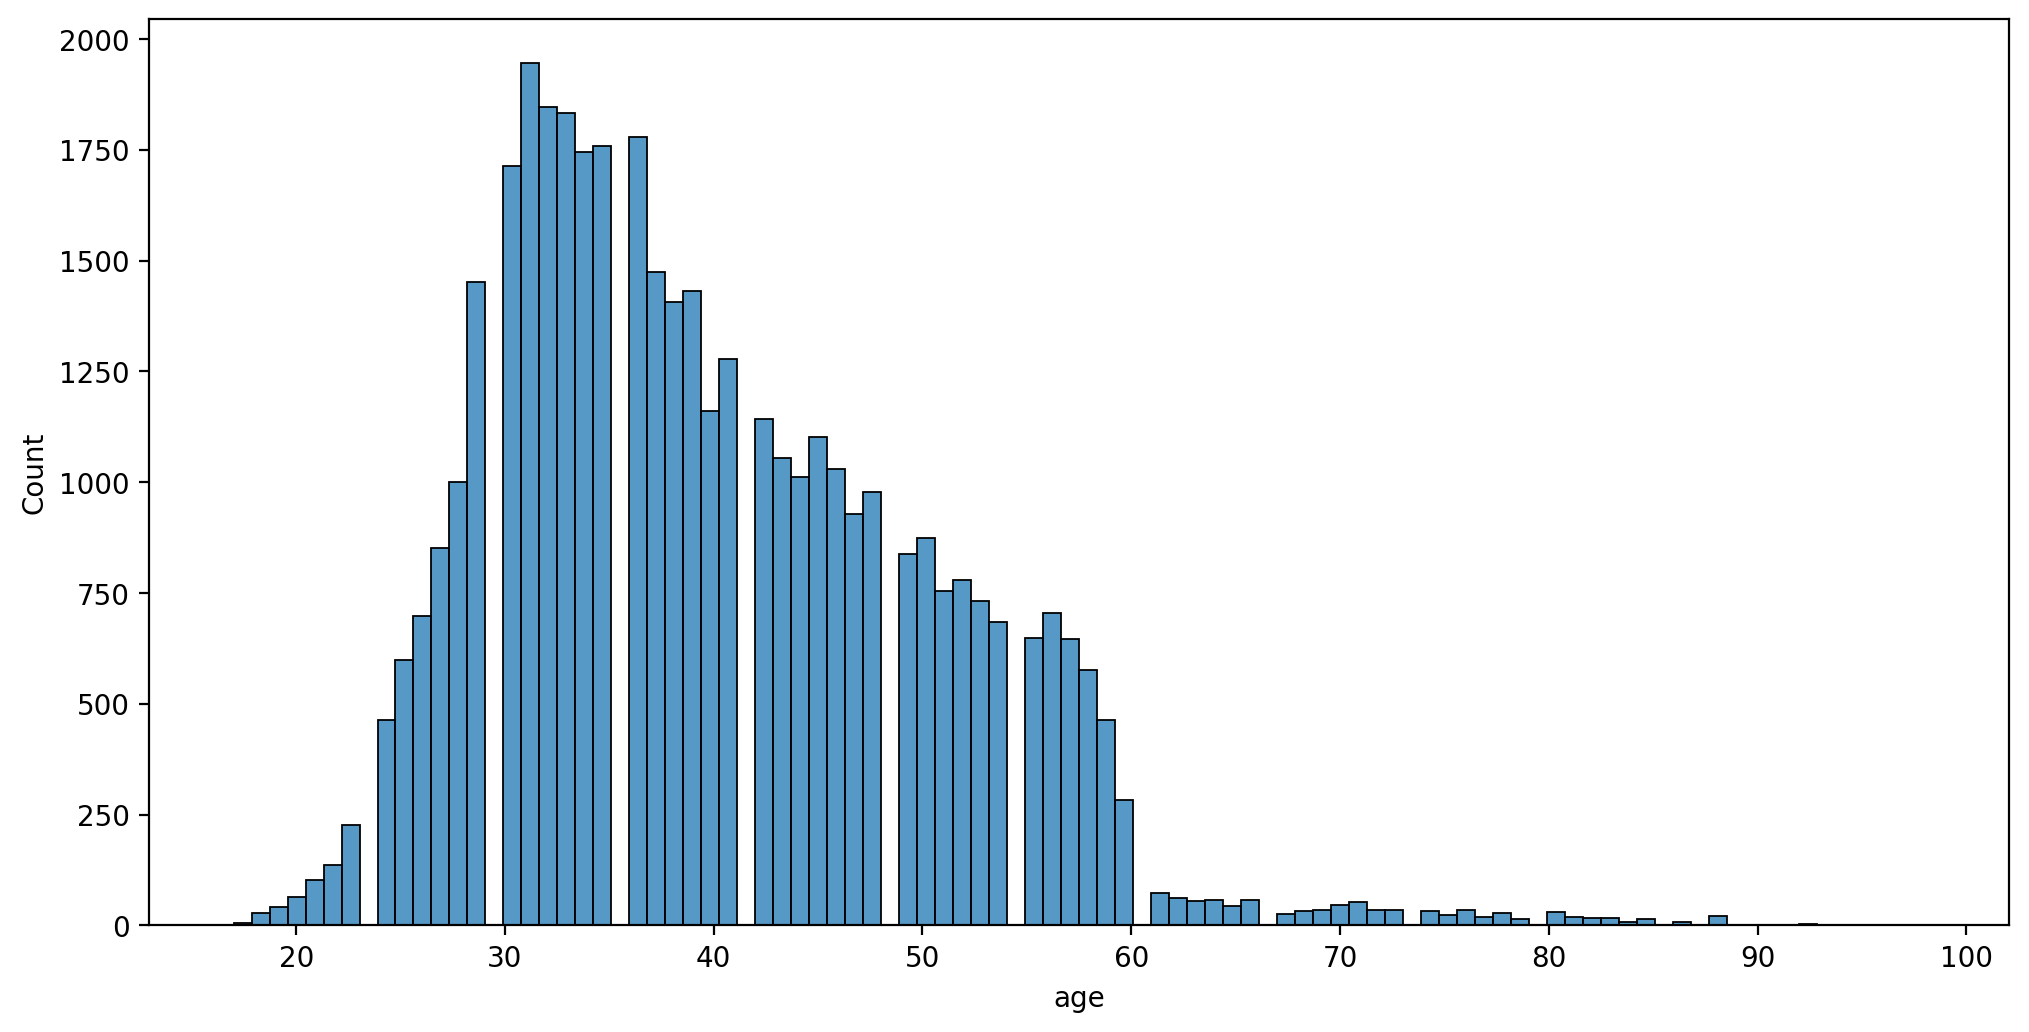

In [6]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='age');

#### SO we can see that most of the age group is between 30 to 40. 
#### We can also see that we have a kind of Cohort analysis here where the dat data is distributed as different groups leaving a particular bin.

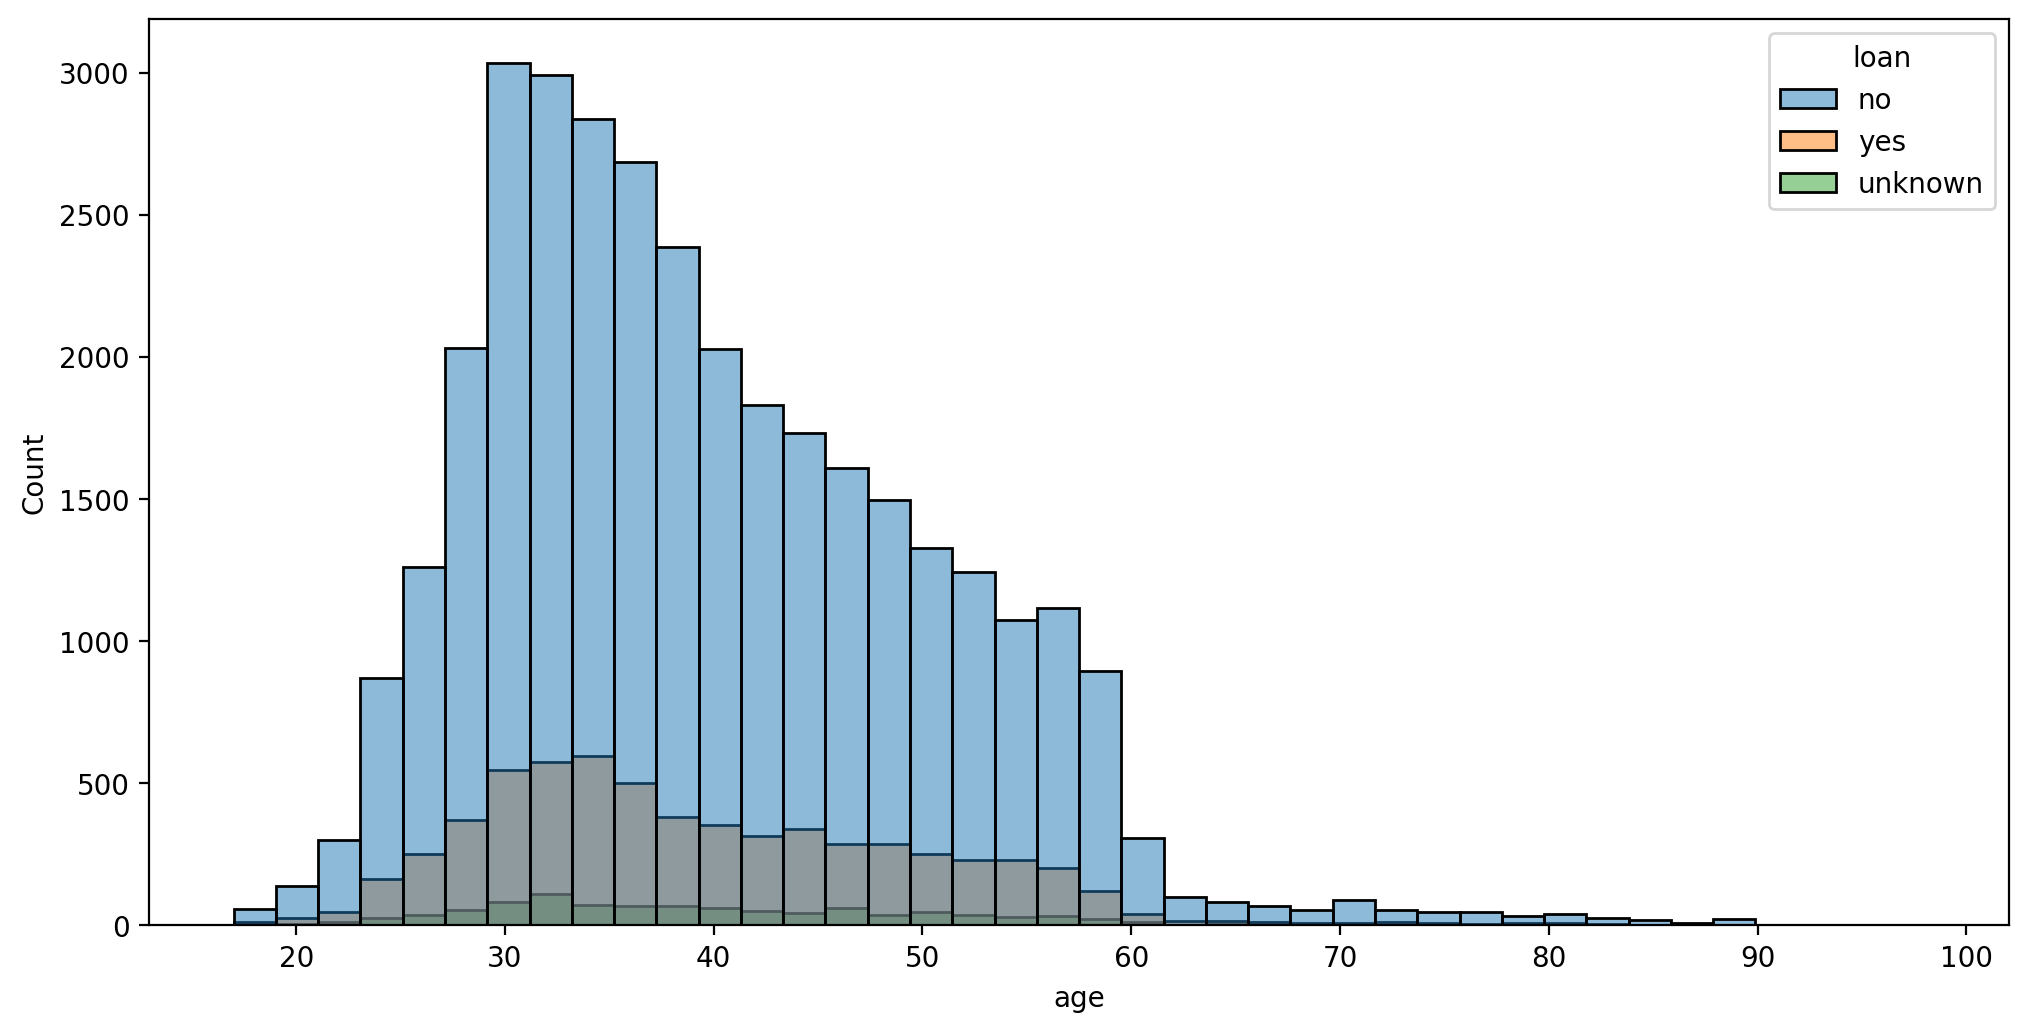

In [7]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='age',bins=40, hue='loan');

### So what we are seeing now here is that between these age groups we are seperating out them by loan.

### We can see that majority of people don't have a loan. 
#### So it becomes an indicator that you would not market/advertise to the people who have pending loans, because they will take another loan.

#### On the other hand a strategy can be made in a way that marketing can be also done to people who have loans, in a way that after having their loans cleared again they could have a new one.

#### So what you do is separate out everyone that does not have a loan and then start clustering that data instead to try to gain insights that way.

#### Now we have a feature called "pdays" -number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).

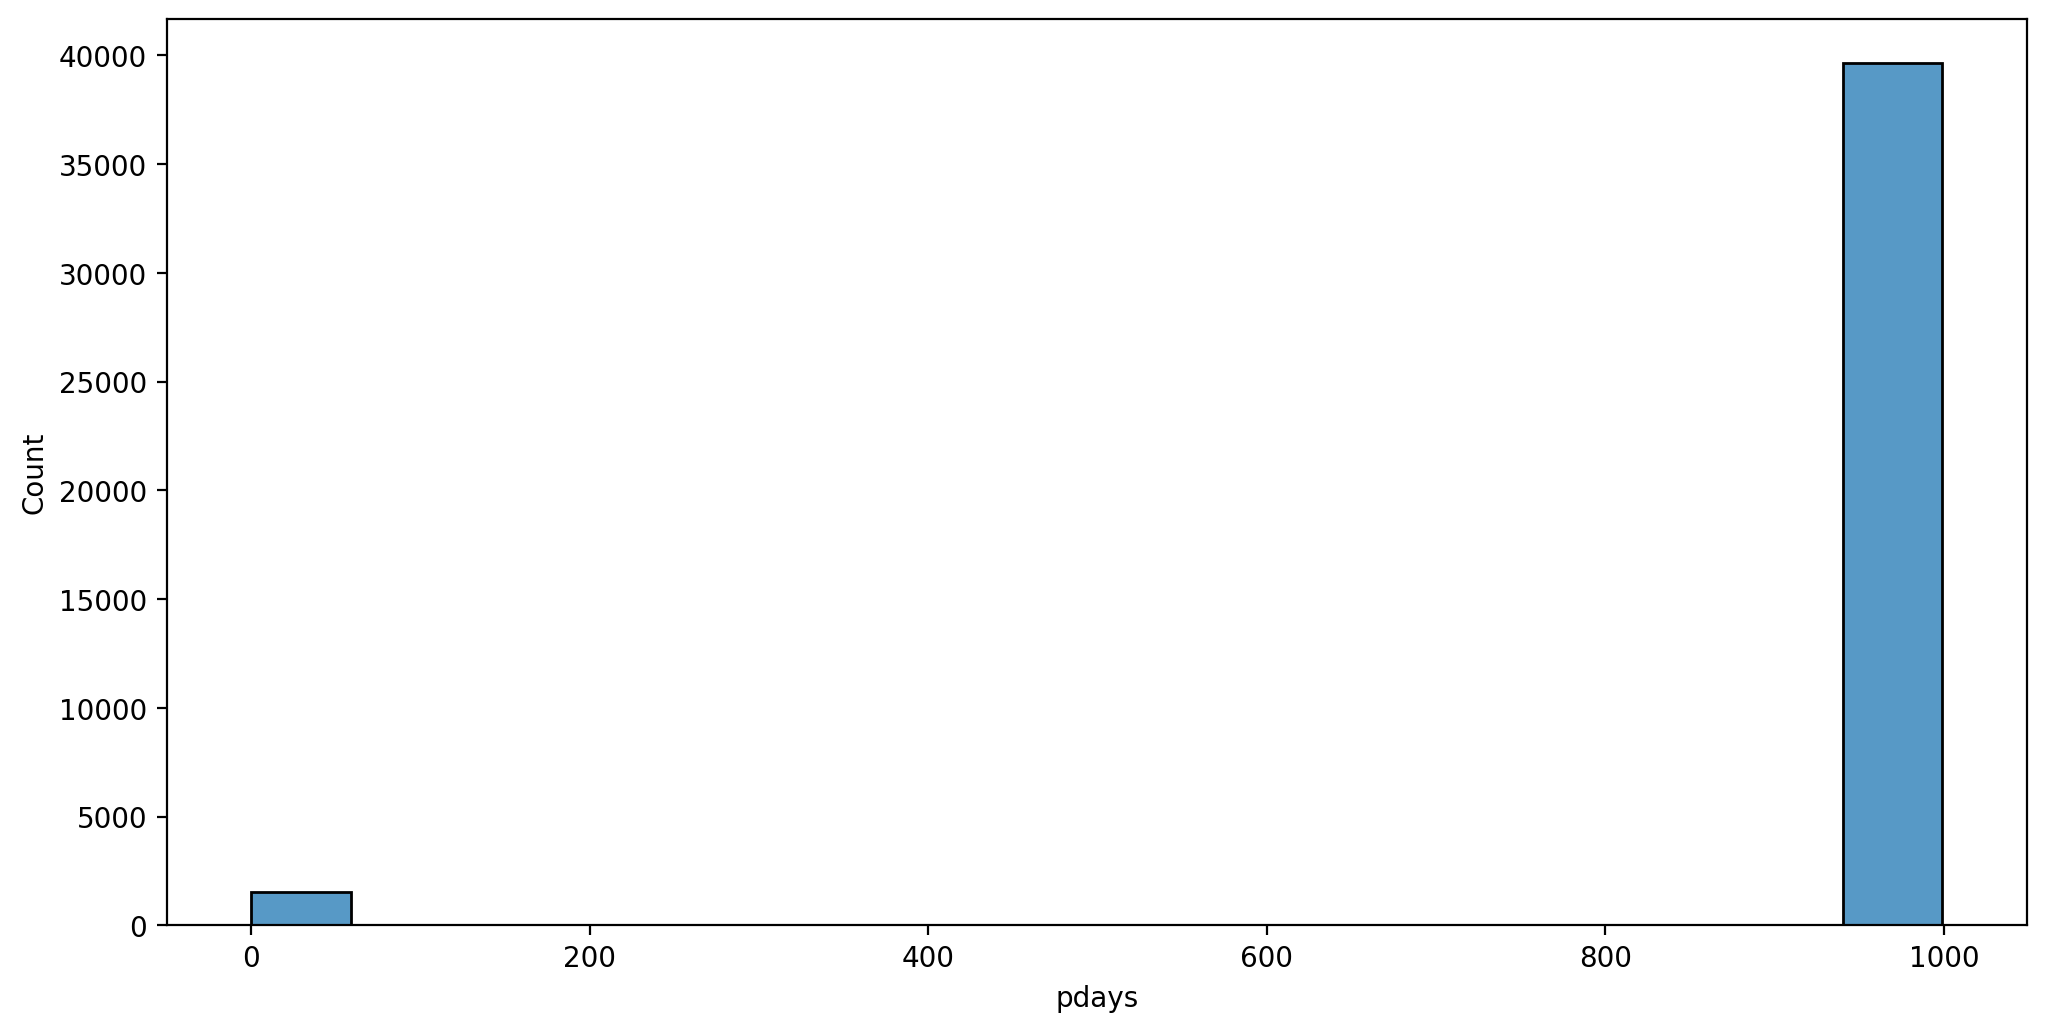

In [8]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df, x='pdays');

#### So a 999 means that the person has never been contacted.
So in order to actually gain some sort of insight we could probably do is shrink down our limits or just drop everyone that is equal to 999 because we know they don't technically count here.

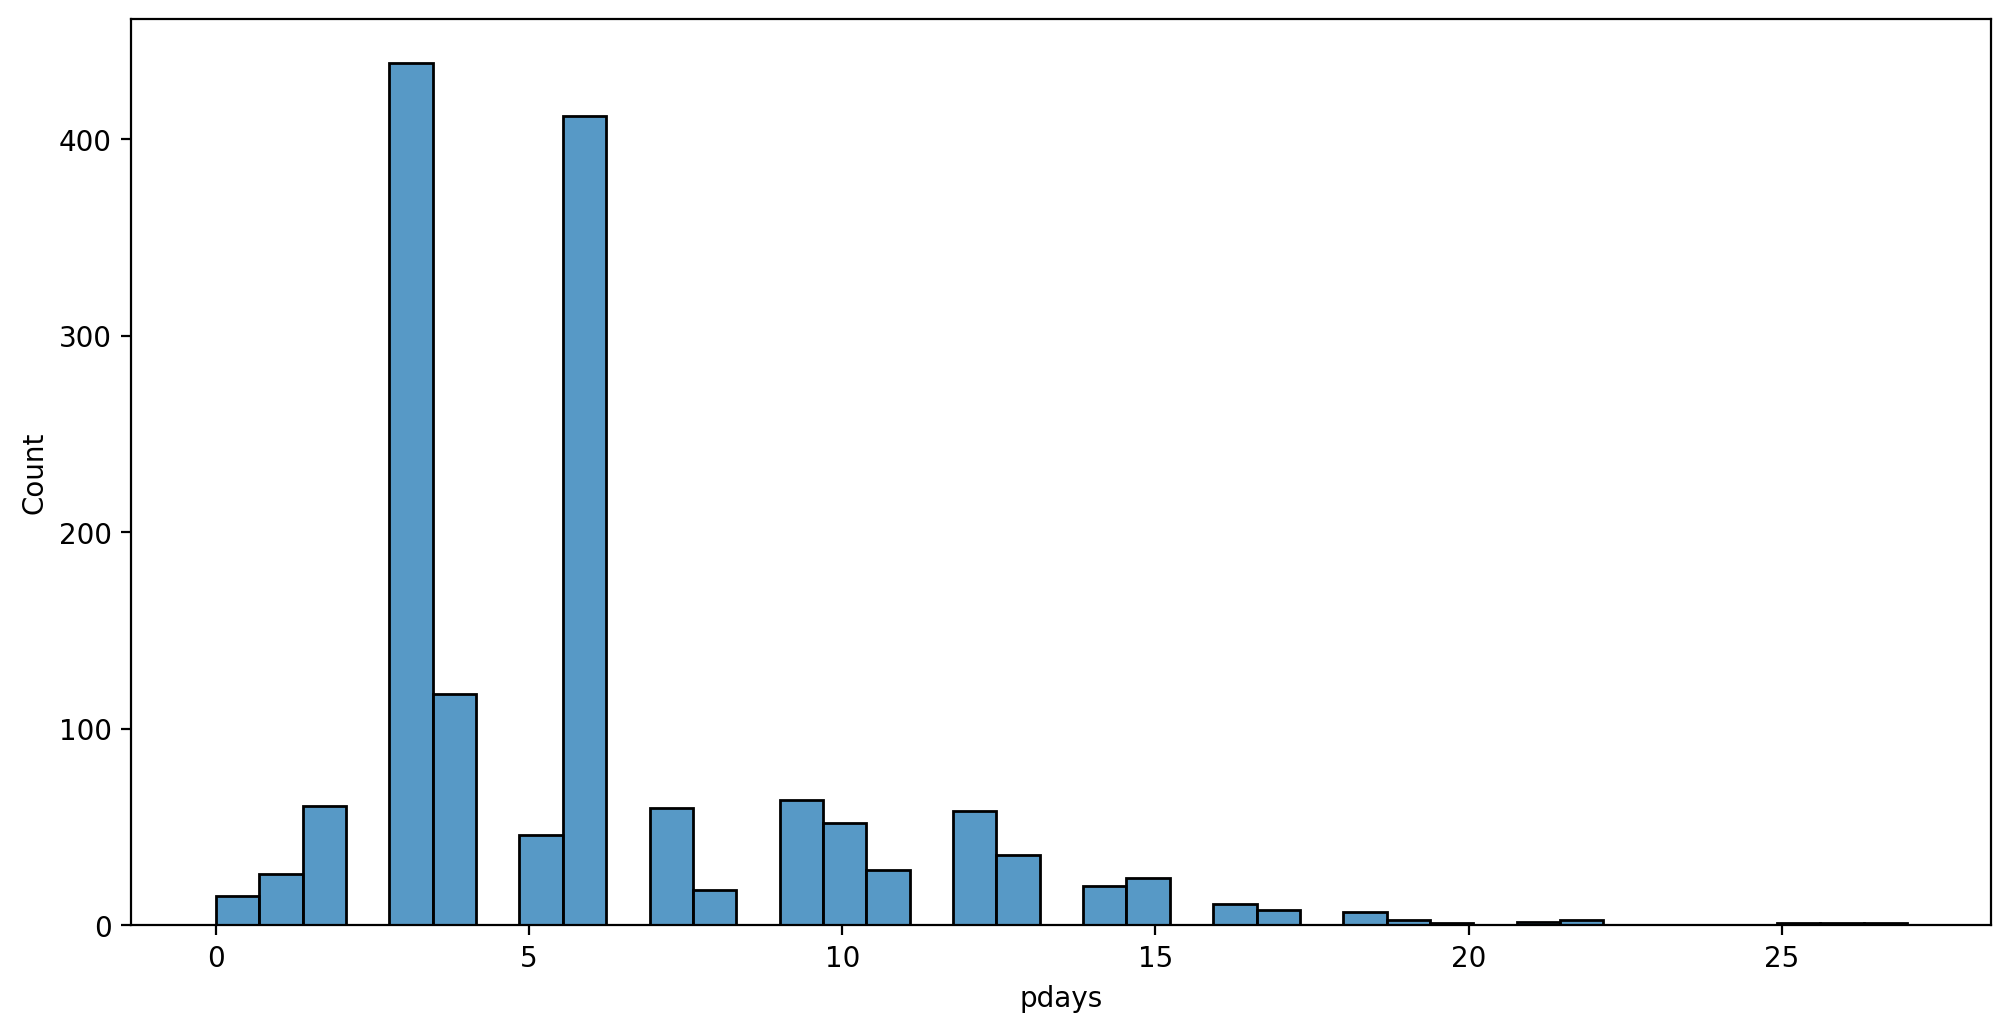

In [9]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays');

#### So here we can see the details about the person who were contacted and we can see their distributions.
So we can see from people who were contacted that most people who were contacted were b/w 3-7 days.

### Duration feature - When the person was last contacted, how long did the conversation last?

In [10]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

So mainly 2 modes of contact were used, so we can ask if we contacted them on cellular or on telephone?

In [11]:
df['duration'] #in seconds

0        261
1        149
2        226
3        151
4        307
        ... 
41183    334
41184    383
41185    189
41186    442
41187    239
Name: duration, Length: 41188, dtype: int64

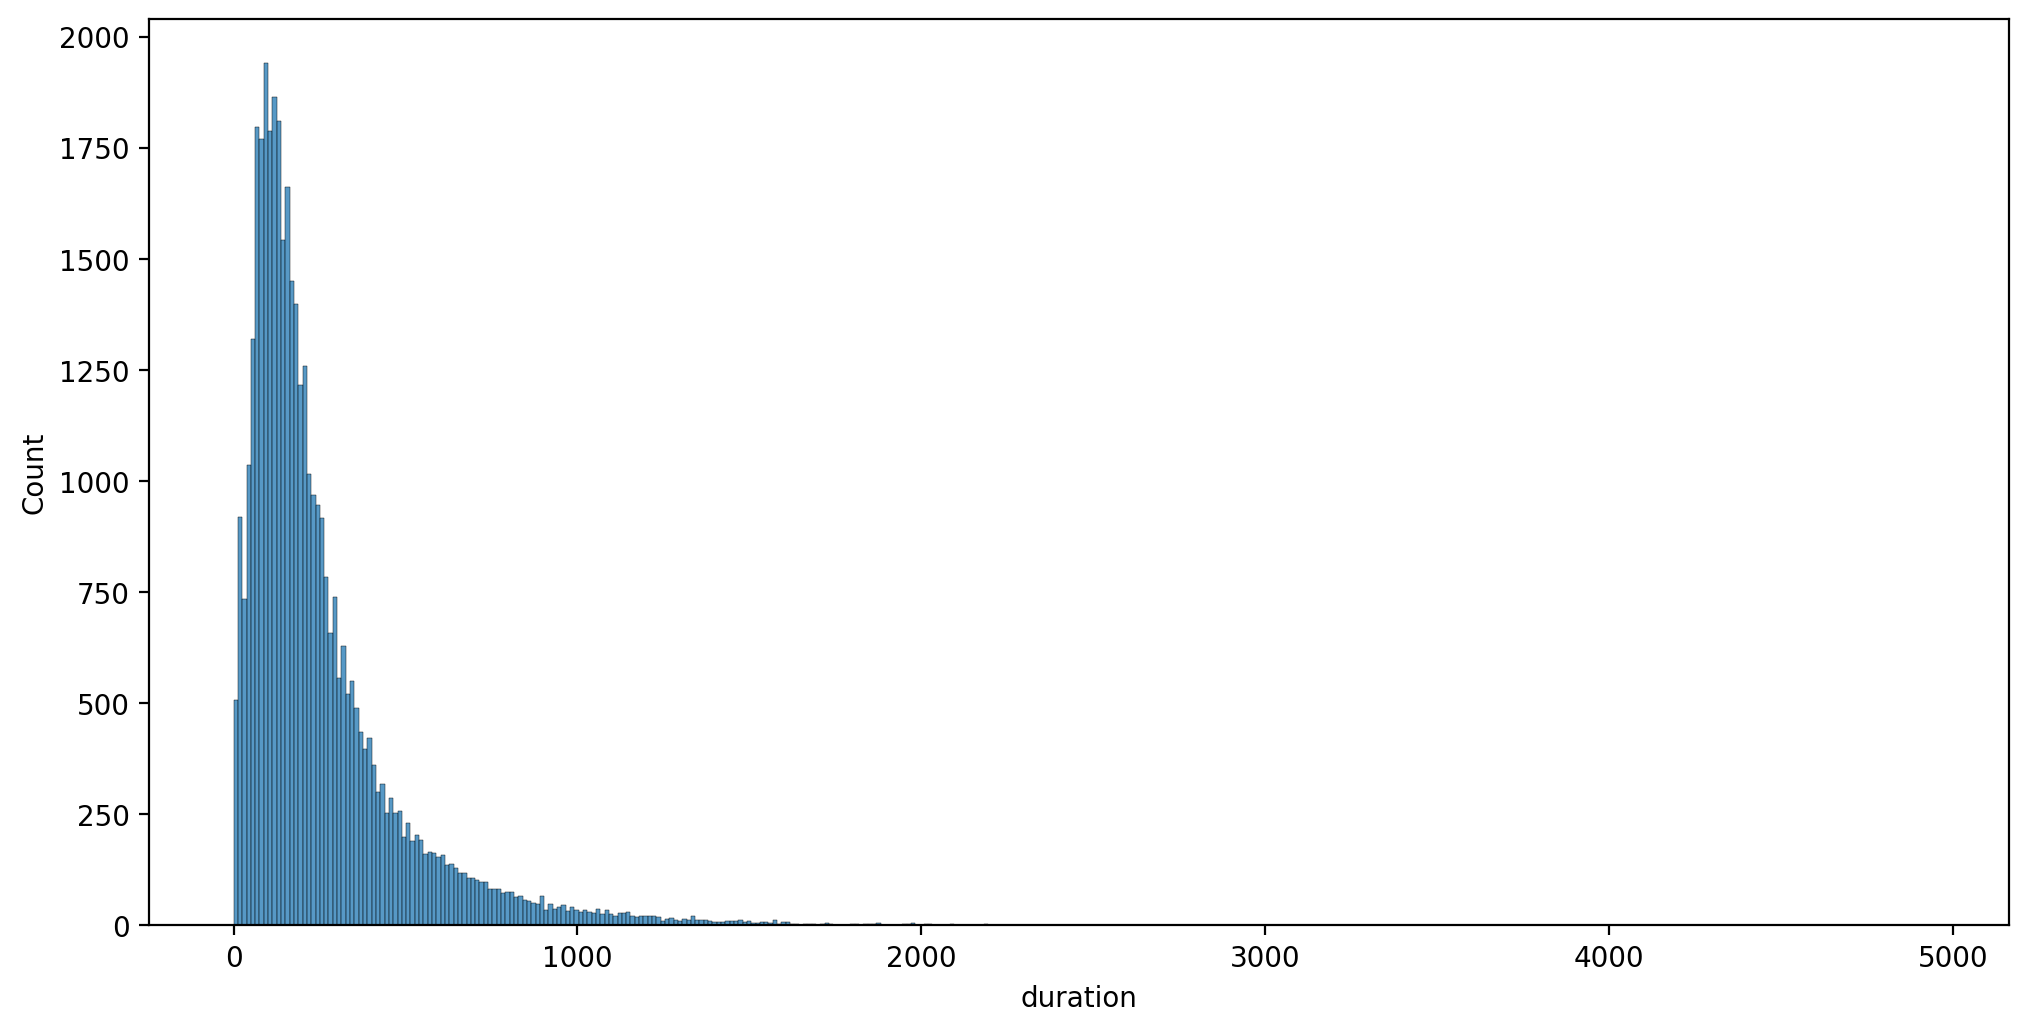

In [12]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration');

#### And here we can see that for duration we have most no of people being contacted for b/w 200-700 seconds.
Note:- 1000 secs = 16 mins.
So most people, you are talking to them between zero and even like the ten minute mark.

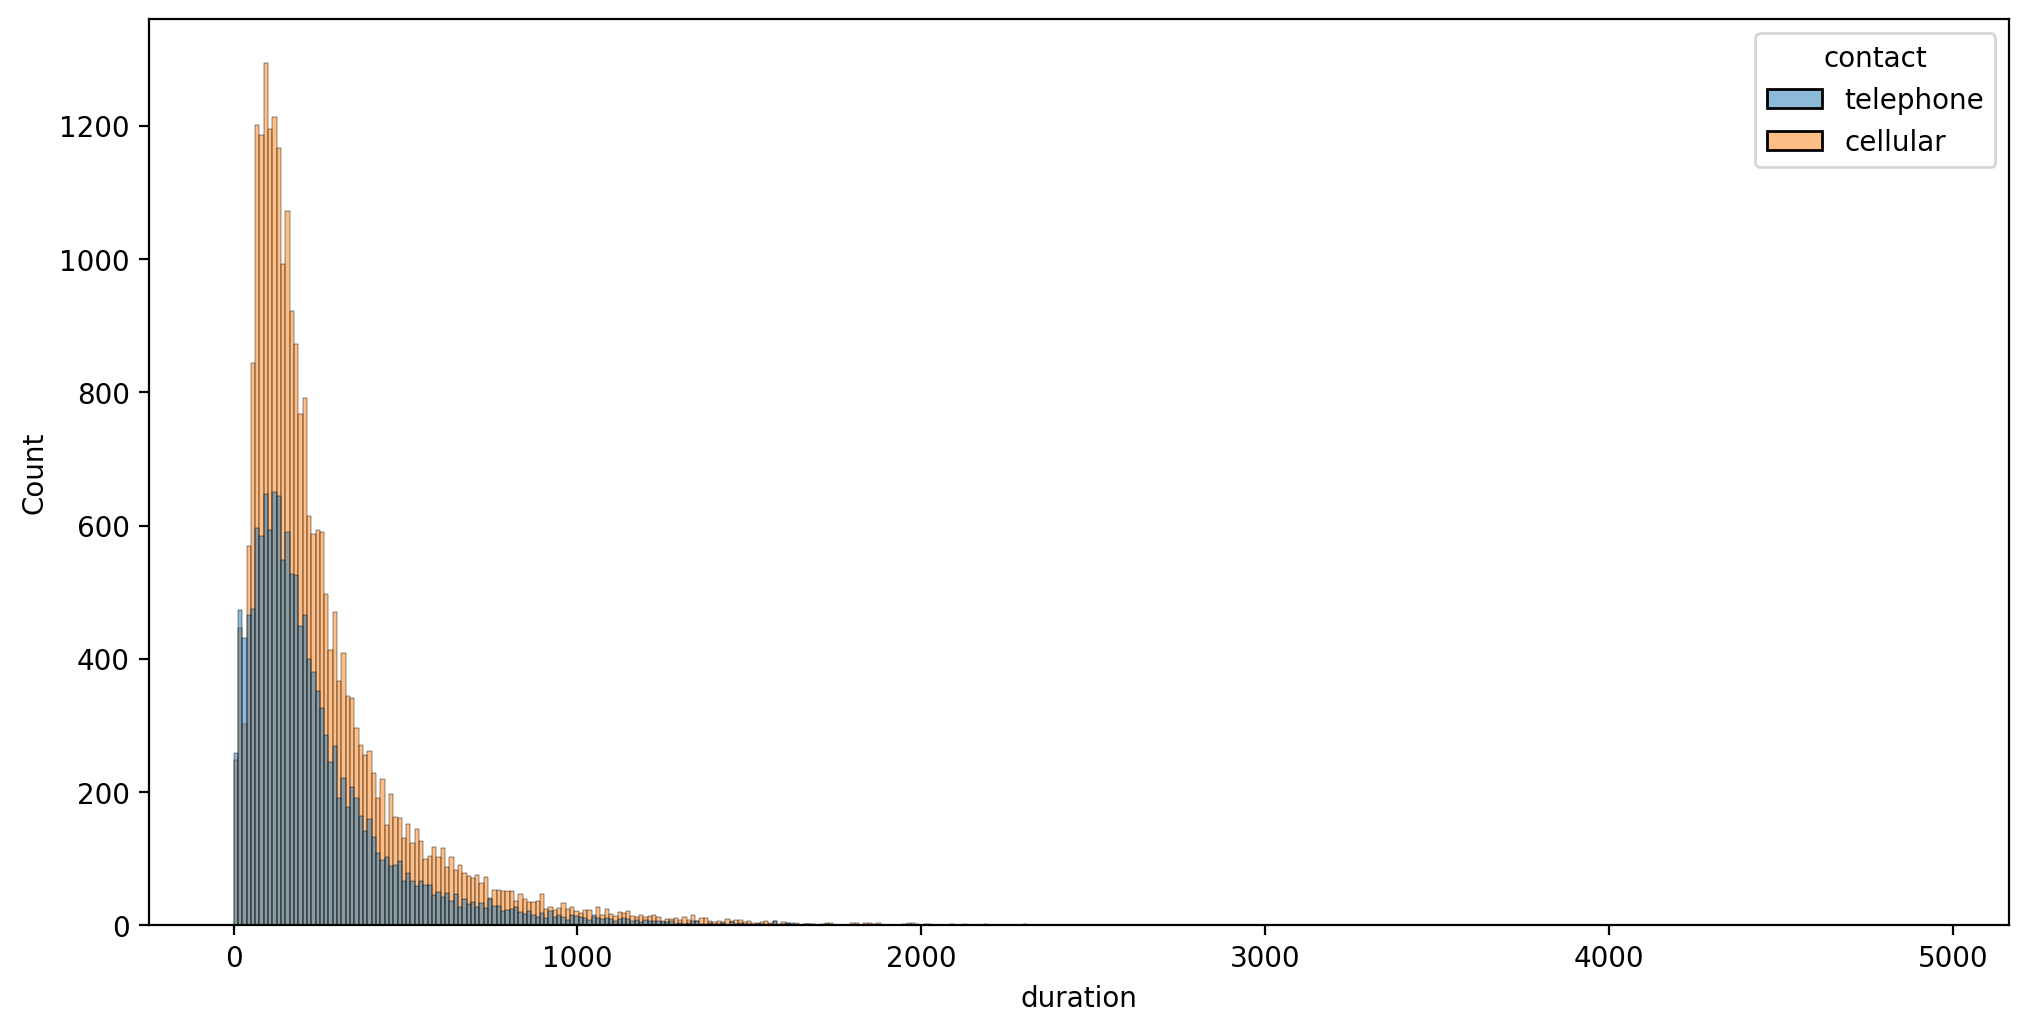

In [13]:
# seperating based on hue=contact
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration',hue='contact');

#### So most of the long duration calls are made on cellular devices.
But the behavior of the distribution, that is the curves themselves are actually extremely similar to previous histogram.

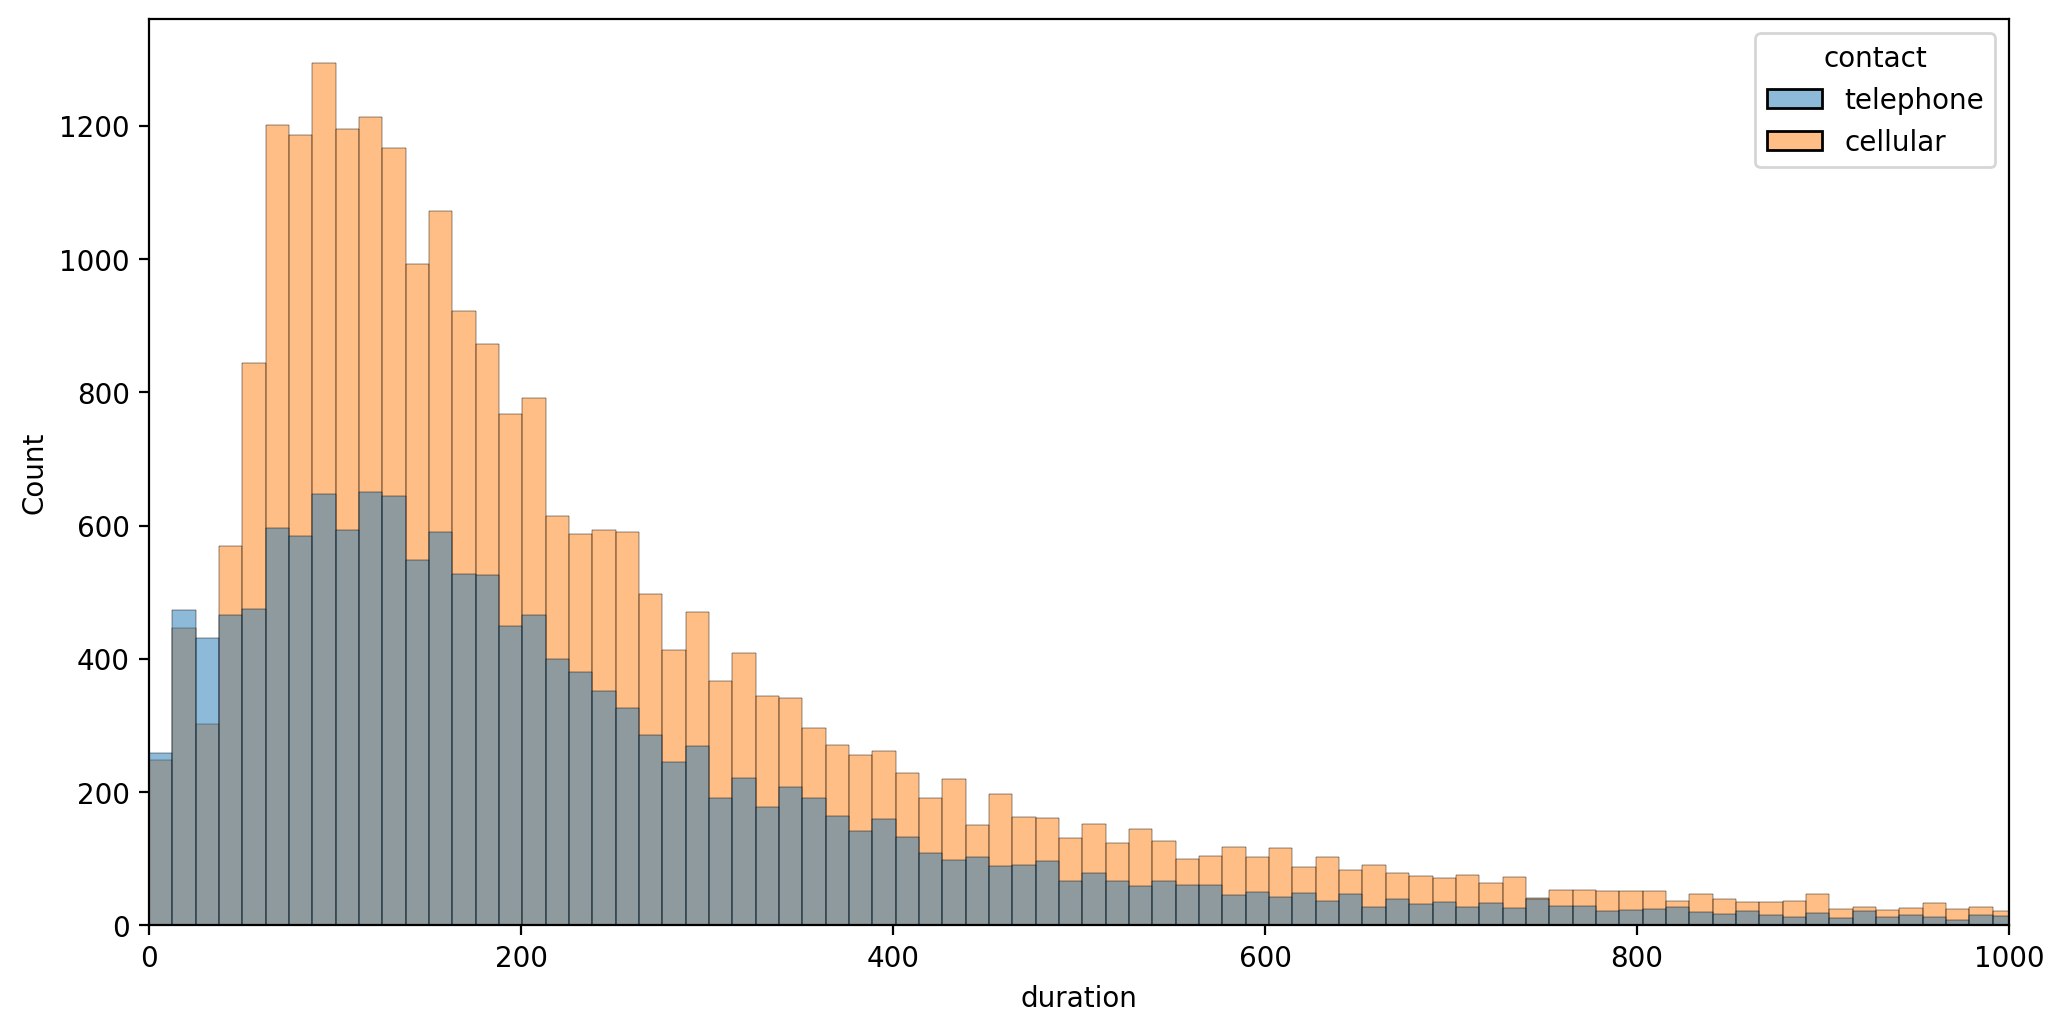

In [14]:
# We can now seperate out them by setting X limits
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='duration',hue='contact')
plt.xlim(0,1000);

So all the calls that were kind of from zero seconds to about 15 minutes and again here we see extremely similar behavior, regardless whether or not they were contacted through a telephone or a cellular phone.

#### And so what's the actual insight we can glean from this is that there's probably just more people that are giving their cell phone rather than a landline telephone. This makes sense, as time goes on, your cell phone is kind of your personal telephone.

### We can also do things like checking out categorical data along with continuous data

#### Now we can also check out that, plot a countplot to check that there are more celluar phone using records vs telephone

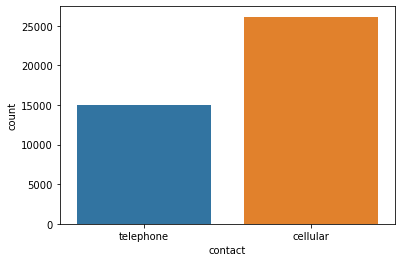

In [15]:
sns.countplot(data=df, x='contact');

So it doesnt matter if you are going to contact them using cellphones or telephones, the distributions of how long the call is roughly the same b/w both as seen in histplot.

In [16]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

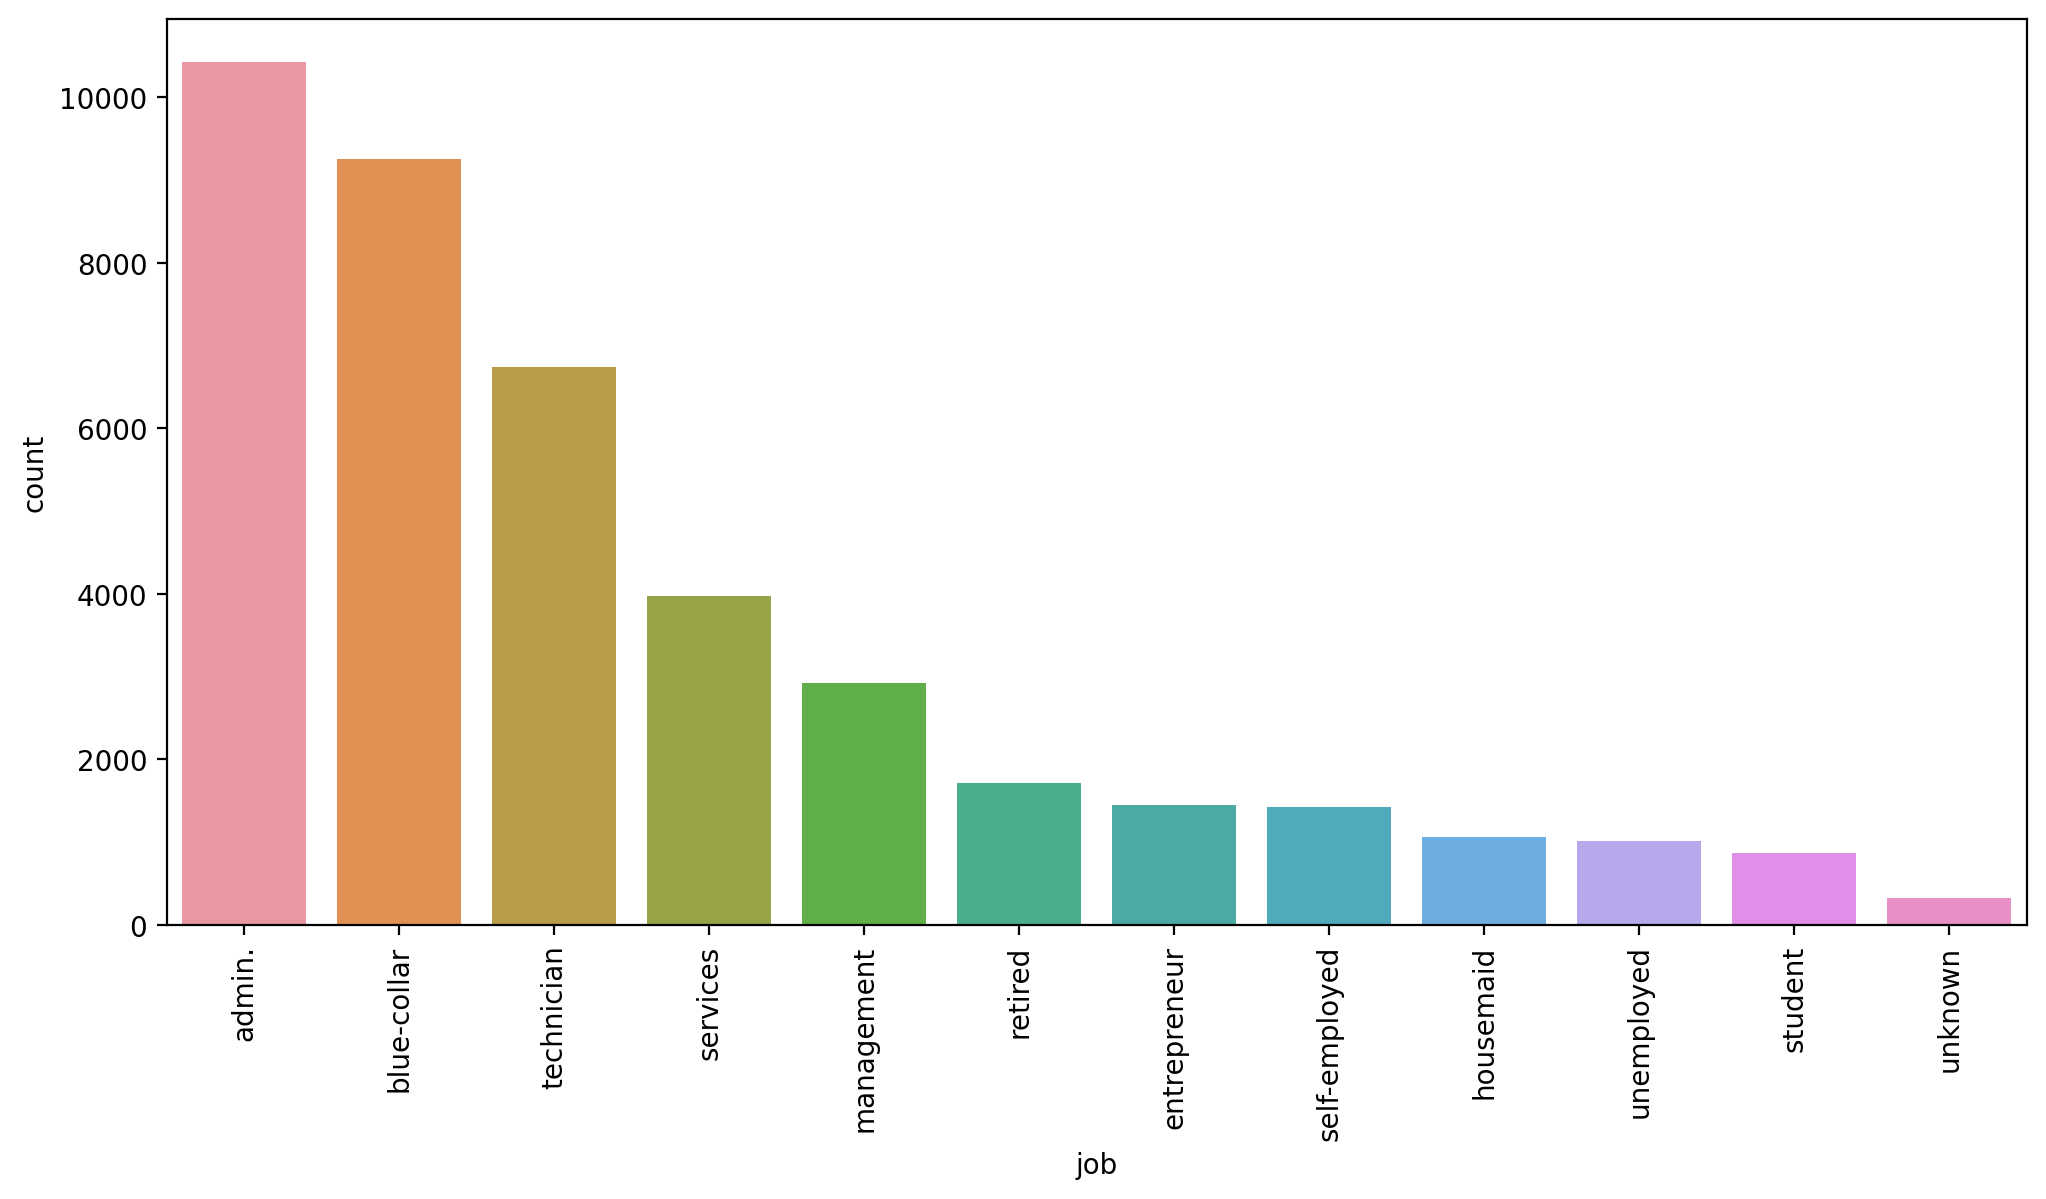

In [17]:
# Types of jobs people have
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df, x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

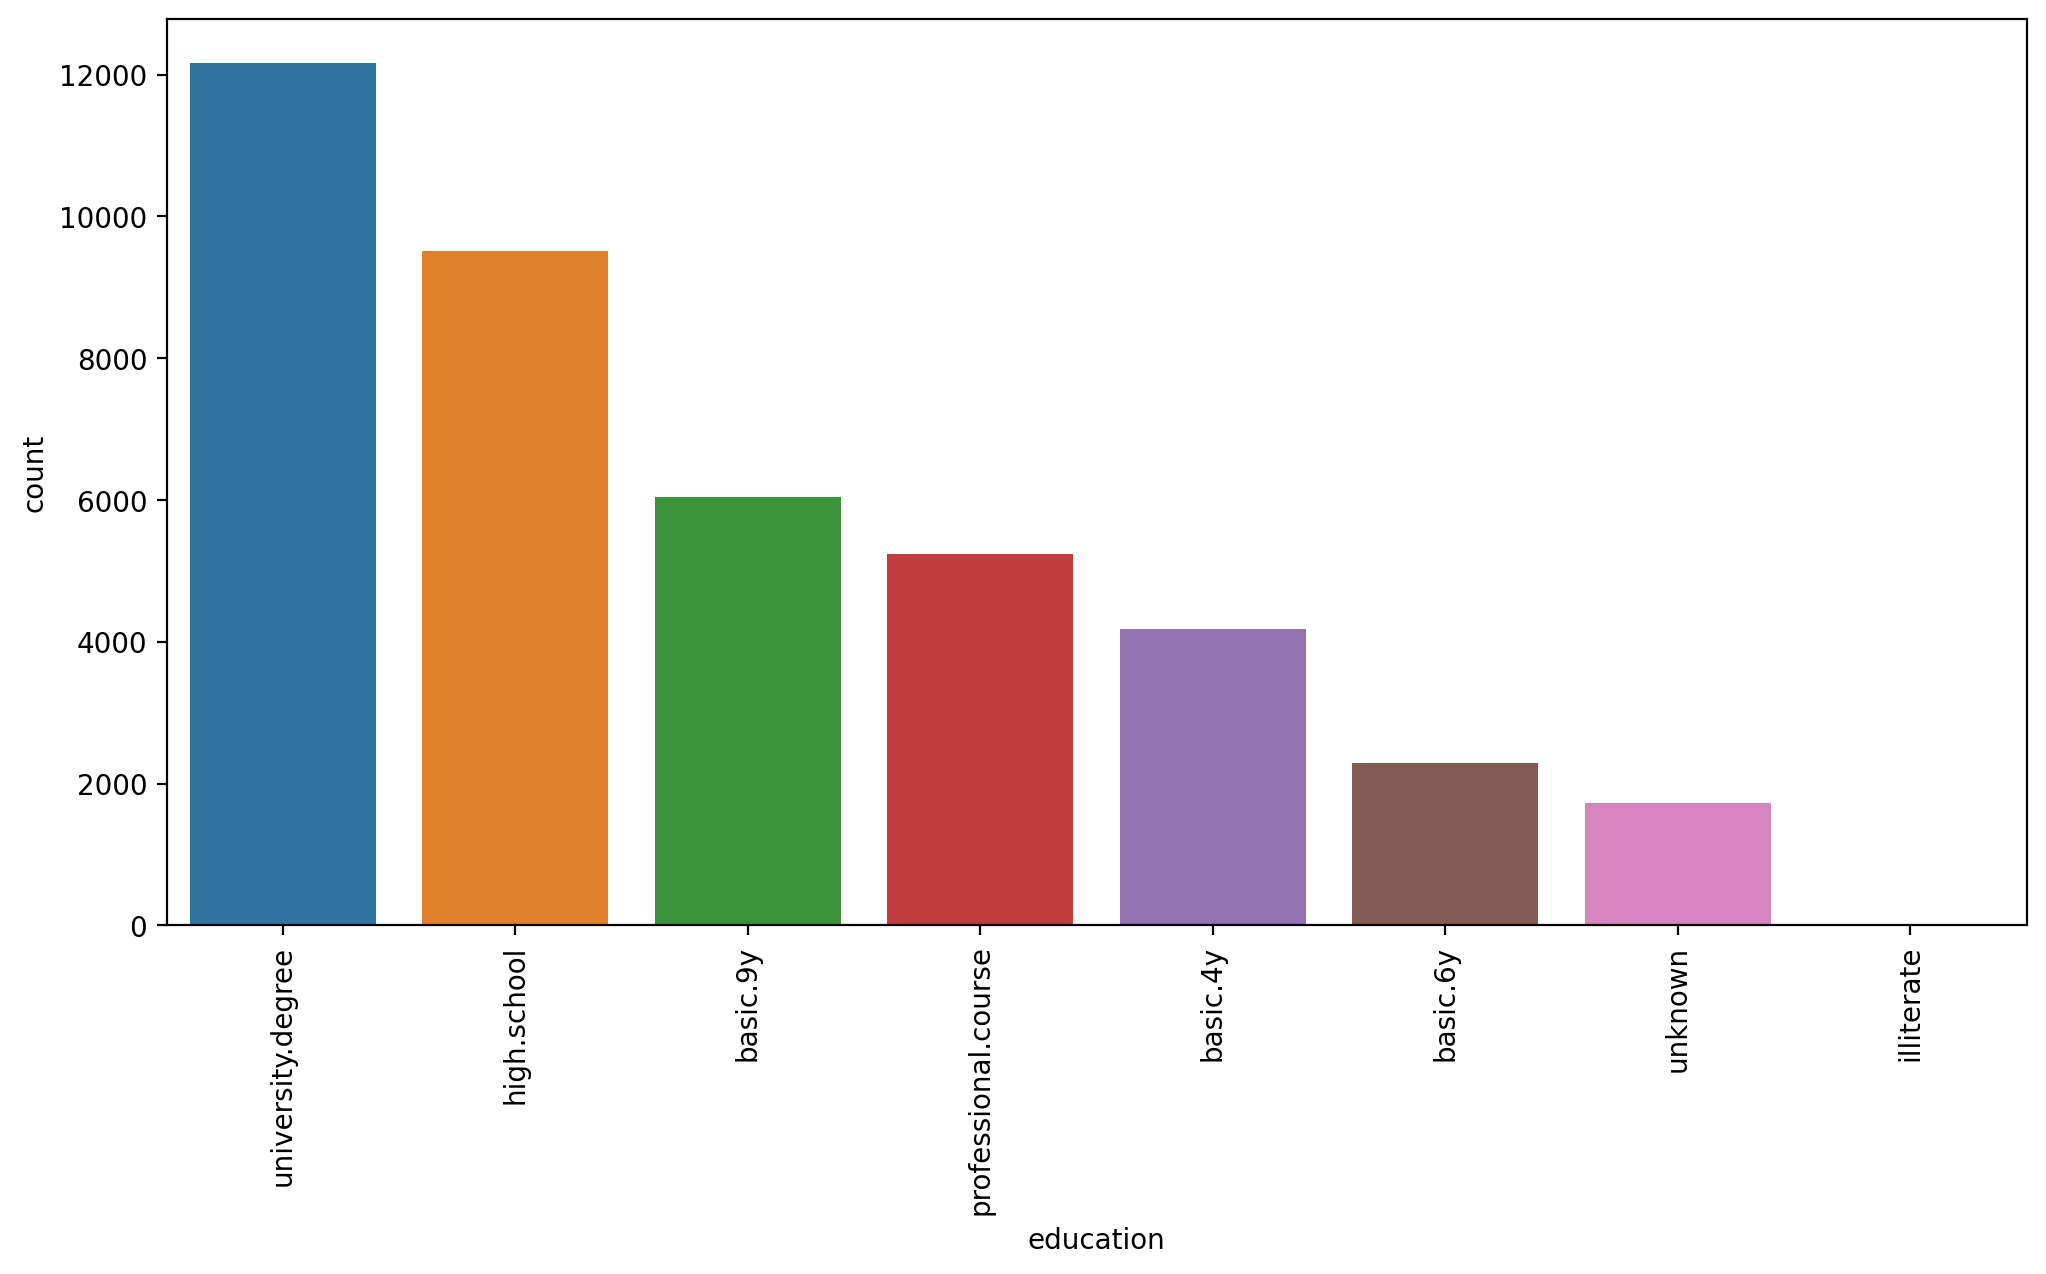

In [18]:
# Education of people
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df, x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

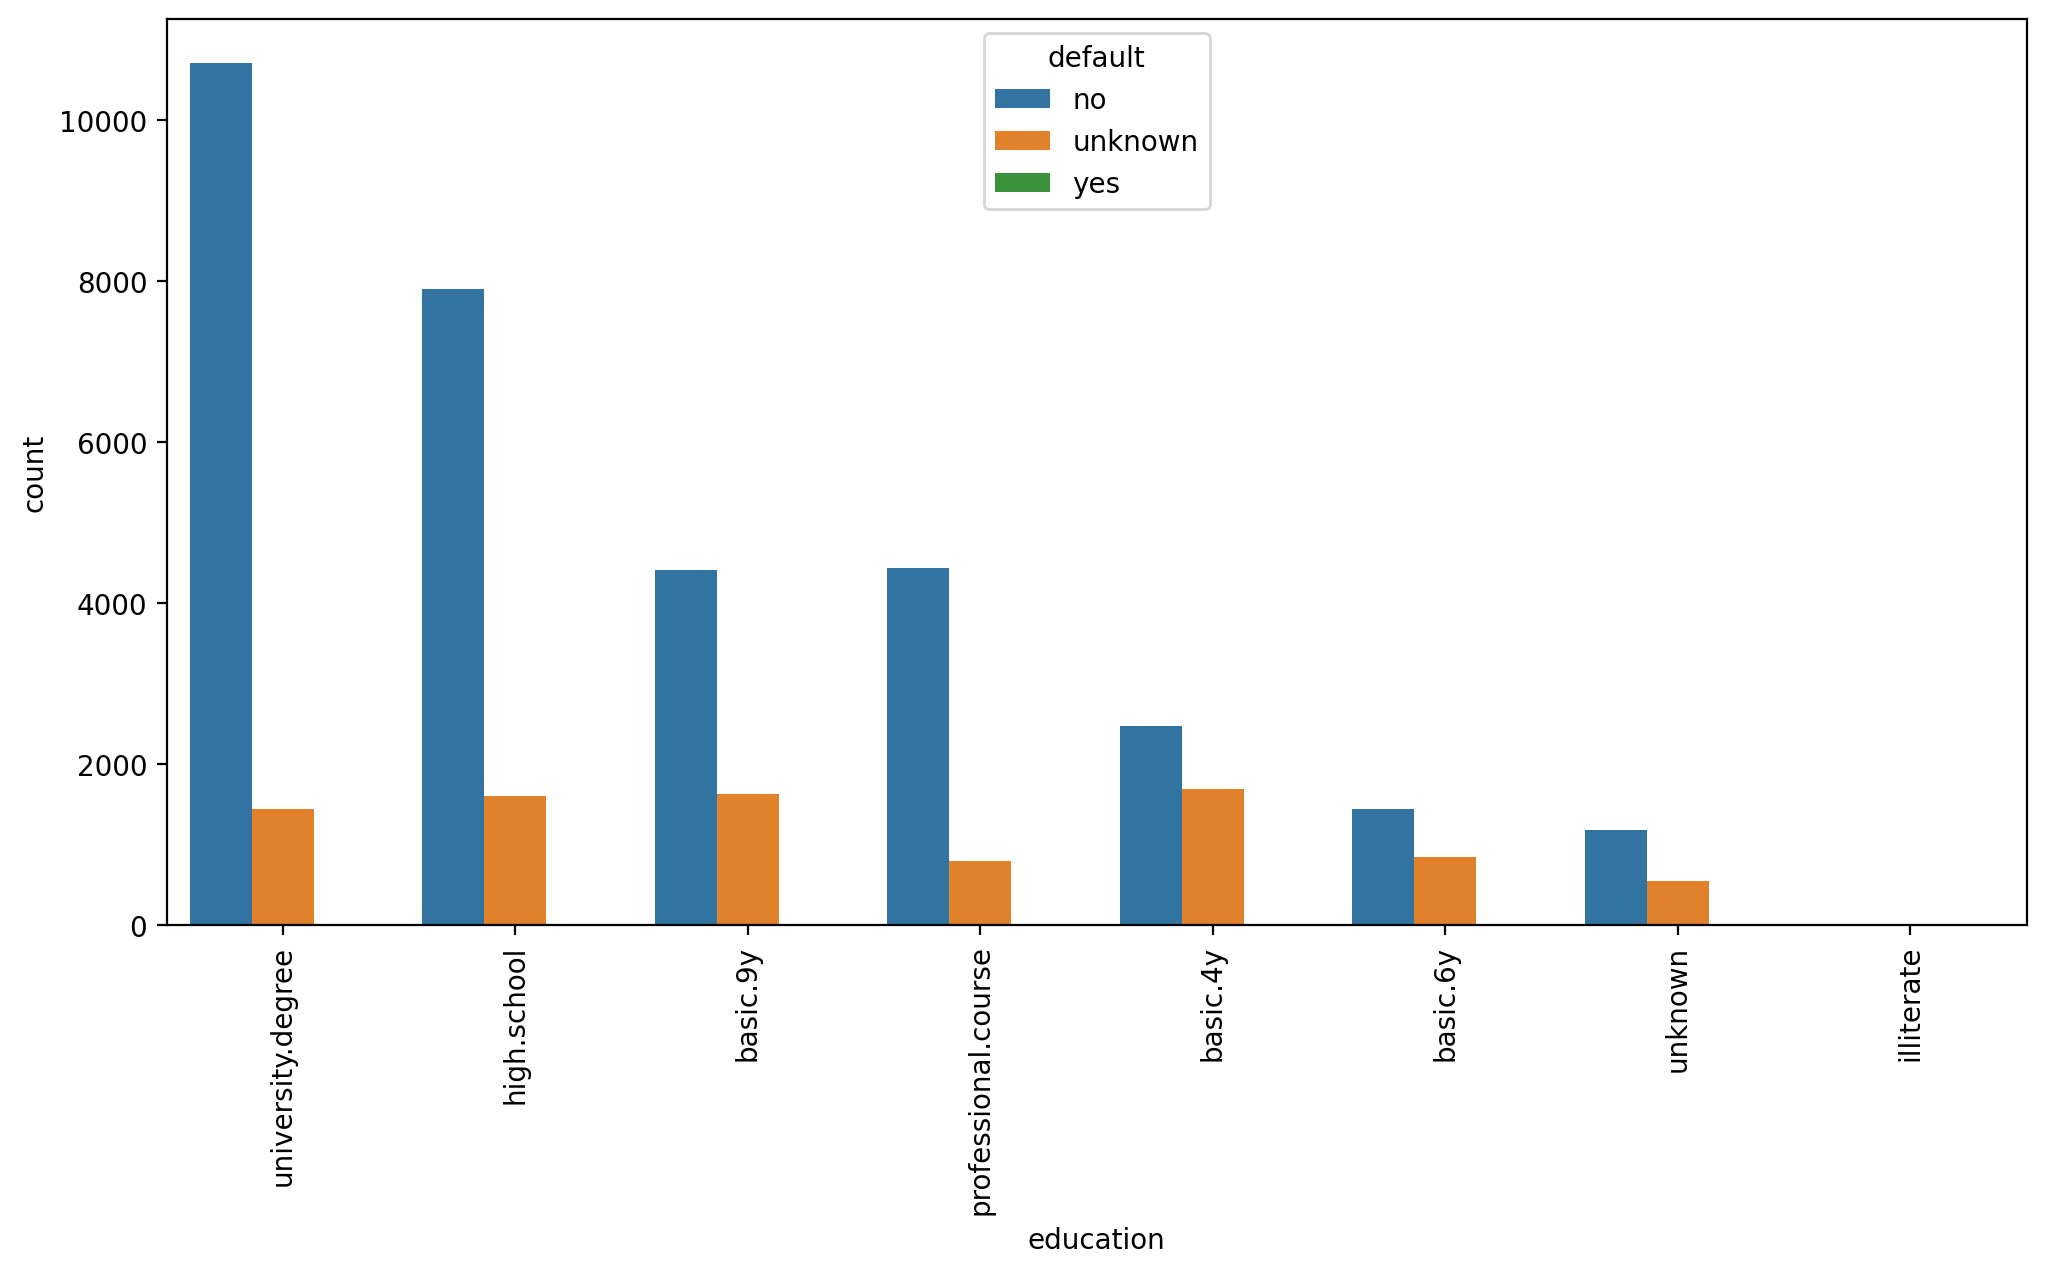

In [19]:
# seeing if they defaulted or not 
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df, x='education',order=df['education'].value_counts().index, hue='default')
plt.xticks(rotation=90);

So the count for the people defaulting is kinda zero as, either they have not defaulted or the status is unkown, could be that they aare currently on a loan and defualt status can't be checked as the loan is still going.

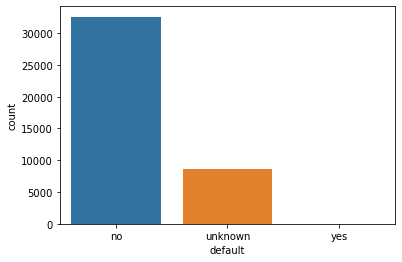

In [20]:
# Checking the deault counts
sns.countplot(data=df, x='default');

In [21]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [22]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

#### So we see that most people actually don't have loans, so this could also be a reason that, if a person does not have loans, they can't default.

# Preparing data and fitting a K-Means Clustering model

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


And when it comes to K means clustering intuitively, We know that we can't really use the categorical data present here because everything is going to be based off of distance metrics.

We're always going to be iterating and checking which point has its closest cluster center for reassignment, which means in order to actually check that distance to the cluster center, we need things to be numeric.

Ex:- I can't really check the distance between something like housemaid and married, but I can check the distance between a zero or one value and job and a zero one value in marital status.

### Thus we need to get dummy variables.

And we also don't really need to worry too much about dropping the first value with the issues of the Dummy variable trap or multiple colinearity, because this is unsupervised learning, which means we're not going to get some sort of coefficient attached to these dummy variables, which means we can just easily say X is equal to PD, get dummies.

### We also don't need to worry about seperating the X and y label, because here there is no y label. Everything is just features

In [24]:
X = pd.get_dummies(df)

In [25]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,1,0,0,1


### Scaling the data 
#### Note that this step is necessary since we're dealing with distance metrics.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaled_X = scaler.fit_transform(X)

So here unlike Supervised learning we don't have X_train and X_test, where we only scale training data to avoid data leakage.

Here we can simply pass the whole data since there is no y label.

### Creating and fitting K-Means cluster model.

In [29]:
from sklearn.cluster import KMeans

In [30]:
#help(KMeans)

The most imp parameter is the n_clusters i.e. no. of clusters

#### So we'll keep value of clusters = 2
Why? 
Though we don't know if this is a good choice but, it's not unreasonabel to think that for a marketeing dataset, there may be "2" two groups. 
1. People I want to market 
2. People I don't want to market.
We dont't know if this is a good assumption, but this is kind of a good starting point.

In [31]:
model = KMeans(n_clusters=2)

Later we'll see how to evaluate the cluster value using elbow method.

For the clustering model we have options:-
1. model.fit - Which is going to compute the K-Means Cluster
2. model.fit_predict - Which is going to compute the cluster centers and predict a cluster index for each sample and return that as well.
3. model.fit_transform - Which is going to compute clustering and transform the X that's passed in to some sort of cluster distant space.( we won't be using this that much)
4. model.predict - When you pass in a single new row, it'll predict the closest cluster it belongs to.

In [32]:
# fit_predict
# Both fitting and then transforming, such as a scaling of the data fit predict is both fitting the model and then predicting or returning the correct cluster labels
cluster_labels = model.fit_predict(scaled_X)

In [33]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

### Now that we have some sort of clusters/ classes generated for each data row, we will now join this back to the original dataset.

In [34]:
X['Cluster'] = cluster_labels

In [35]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,0


#### So now we have these kind of newly discovered column that will most likely be our Y label, which has 0 for some rows and 1 for some. 

## And that is how clustering works !!!

### Now how to interpret this?
One way is to see how correlated are the other features against the cluster.

In [36]:
X.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,...,0.019027,-0.021356,0.019137,-0.023671,-0.002537,-0.016376,0.035626,-0.030399,0.030399,-0.019767
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,...,-0.023068,0.014666,0.004140,0.014537,-0.013311,-0.011665,0.044876,-0.405274,0.405274,0.039581
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,...,0.014405,0.005141,-0.025125,-0.021088,-0.068890,0.087645,-0.050893,0.066357,-0.066357,-0.129103
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,...,0.001031,-0.008186,-0.007300,0.001021,0.006354,0.491353,-0.950700,0.324914,-0.324914,-0.267714
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,...,-0.002012,0.001512,0.000090,-0.003929,0.682608,-0.878776,0.524045,-0.230181,0.230181,0.478493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
poutcome_nonexistent,-0.016376,-0.011665,0.087645,0.491353,-0.878776,0.472501,0.304264,0.099724,0.488406,0.493051,...,0.002226,-0.000585,0.001574,0.006545,-0.853119,1.000000,-0.466928,0.193507,-0.193507,-0.544406
poutcome_success,0.035626,0.044876,-0.050893,-0.950700,0.524045,-0.256886,-0.077416,0.084824,-0.281022,-0.350613,...,-0.002276,0.008827,0.007258,-0.000390,-0.063006,-0.466928,1.000000,-0.316269,0.316269,0.254406
subscribed_no,-0.030399,-0.405274,0.066357,0.324914,-0.230181,0.298334,0.136211,-0.054878,0.307771,0.354678,...,0.021265,-0.013888,-0.008046,-0.006302,-0.031799,0.193507,-0.316269,1.000000,-1.000000,-0.294472
subscribed_yes,0.030399,0.405274,-0.066357,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,...,-0.021265,0.013888,0.008046,0.006302,0.031799,-0.193507,0.316269,-1.000000,1.000000,0.294472


We only care about how the features are correlated to the cluster values / newly created y labels

In [37]:
X.corr()['Cluster']

age                    -0.019767
duration                0.039581
campaign               -0.129103
pdays                  -0.267714
previous                0.478493
                          ...   
poutcome_nonexistent   -0.544406
poutcome_success        0.254406
subscribed_no          -0.294472
subscribed_yes          0.294472
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [38]:
# We dont want to see cluster vs cluster
X.corr()['Cluster'][:-1].sort_values()

euribor3m              -0.959328
emp.var.rate           -0.932622
nr.employed            -0.886190
cons.price.idx         -0.679350
poutcome_nonexistent   -0.544406
                          ...   
subscribed_yes          0.294472
month_apr               0.357942
contact_cellular        0.410444
poutcome_failure        0.464320
previous                0.478493
Name: Cluster, Length: 65, dtype: float64

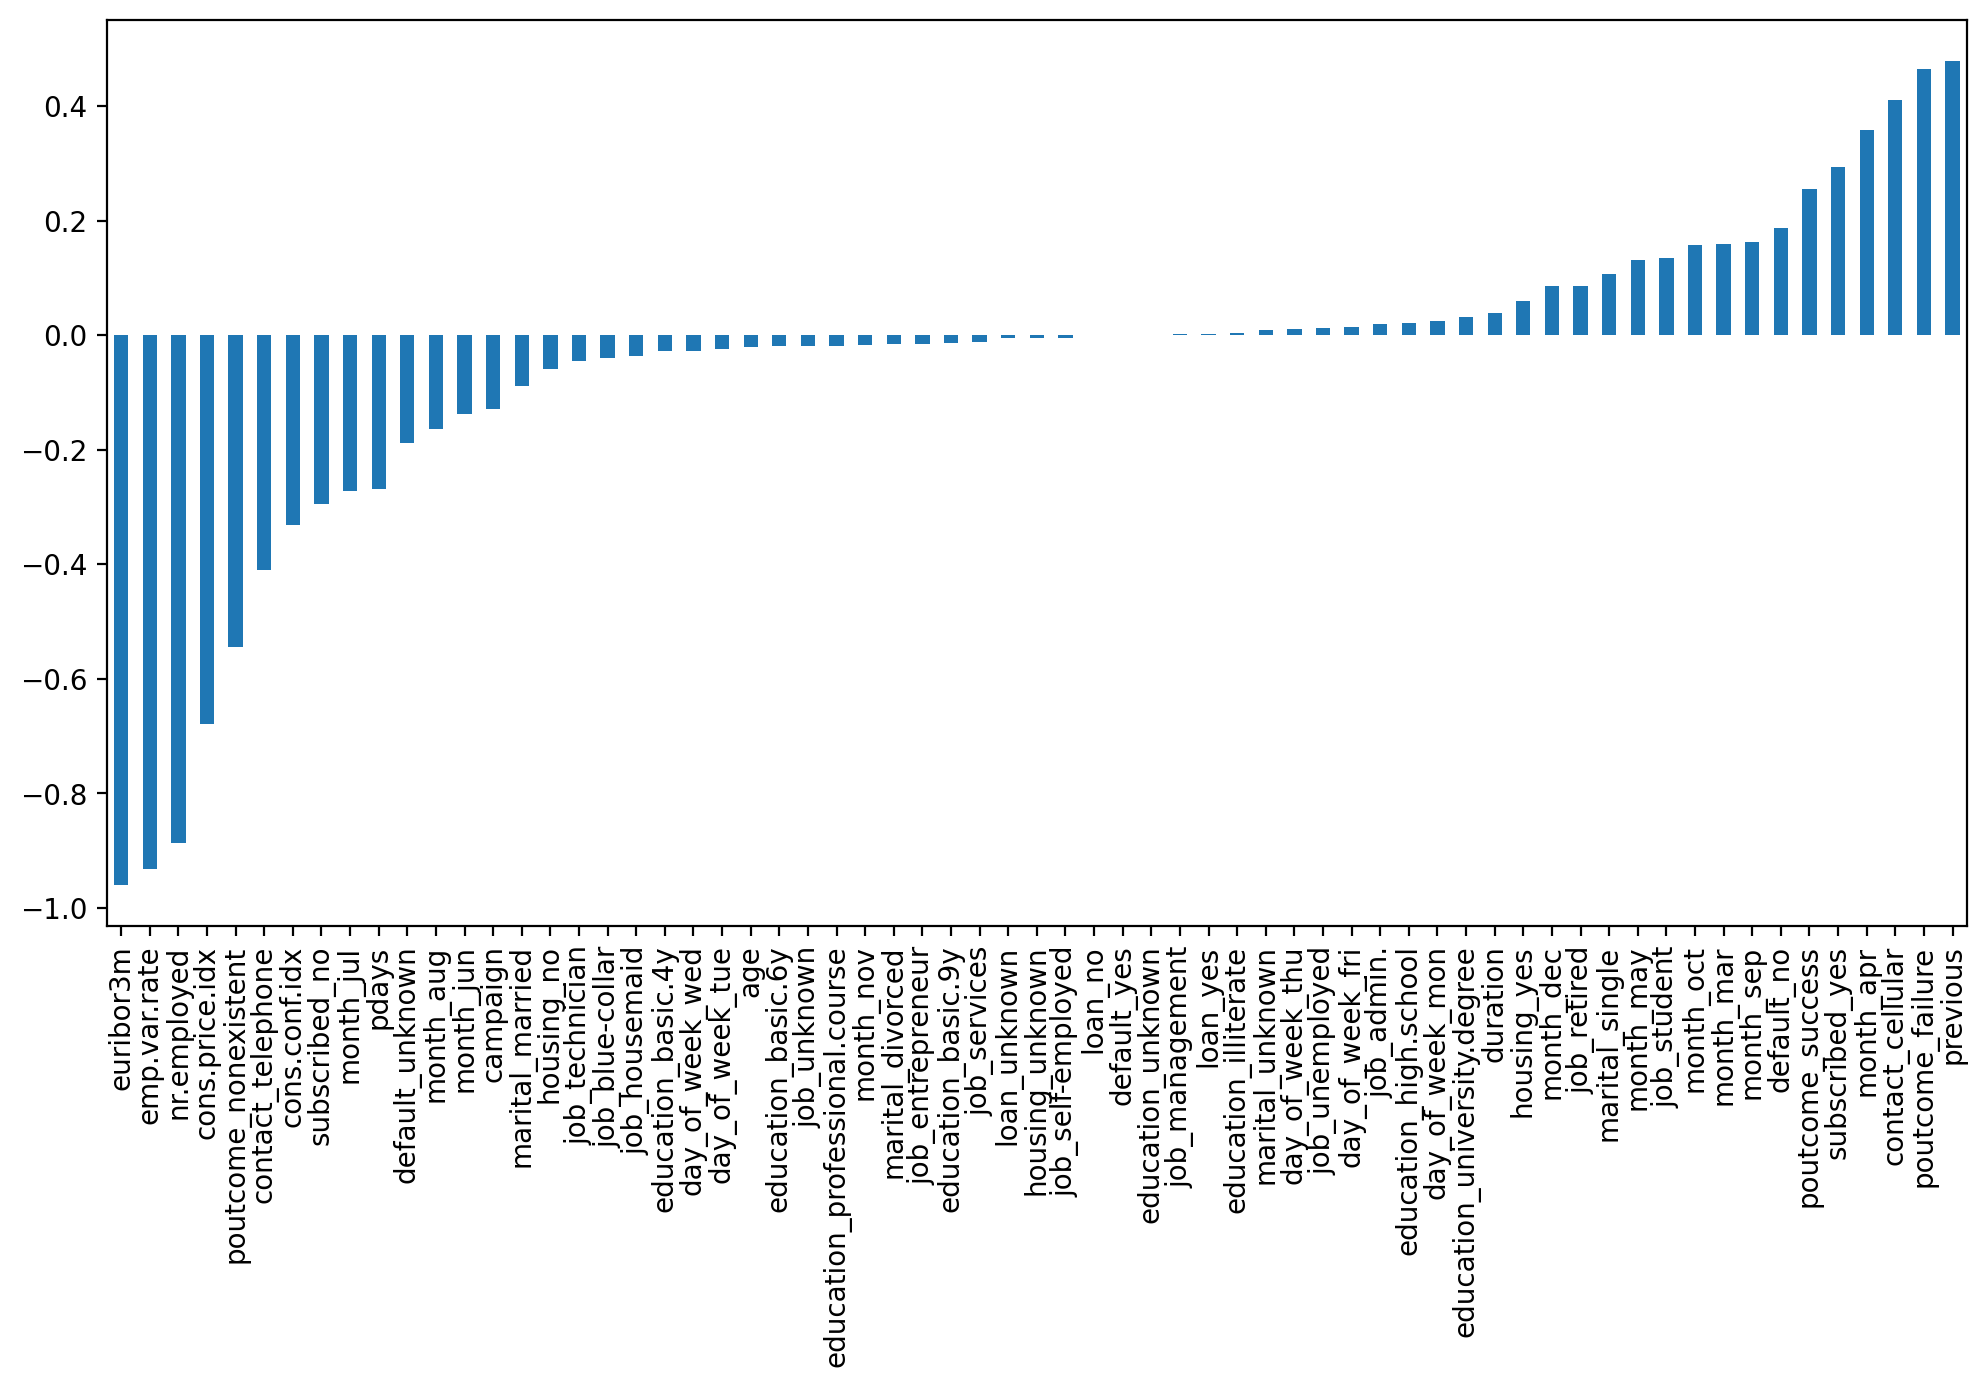

In [39]:
# Plotting it out
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'][:-1].sort_values().plot(kind='bar');

### So here we can see what features are being highly considered as a part of the clusters.

And once you understand what features are important to a particular cluster assignment, then you can talk to a person that has domain experience and try to get an intuition of what these clusters actually 
represent.

### So again, this was for Kmeans and number of clusters= 2.

And you can say, OK, now I know from correlation plot what features are important for, separating out all this feature data into two separate clusters. 

Now What can I use with my domain knowledge and domain experience to understand what these two clusters truly represent?

And again, there's nothing really there as like a definitive ground truth to check your results against.

OK, so this is just in a general idea of trying to understand how the features connect to the clusters.

------
### We still need to discuss the methodologies for choosing a K-value.

1. How do we choose a reasonable value for K number of clusters?
2. Is there any way we can evaluate how good our current K value is at determining clusters?

### Elbow method
As we increase the value of K , we will be measuring the SSD - Sum of squared distance from points to their cluster centres.

The goal would be choose a K value that minimizes the the SSD value as much as possible.

In [53]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_) # inertia_ is the scikit learn call to calculate the SSD values

In [54]:
ssd

[2469792.3923062515,
 2370786.7651238036,
 2271502.8270116188,
 2217633.1310479725,
 2152173.98957855,
 2109764.6138531542,
 2082009.1063836922,
 2017292.2631579193]

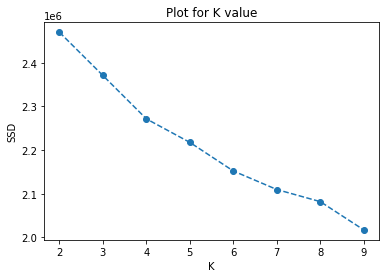

In [55]:
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K')
plt.ylabel('SSD')
plt.title('Plot for K value');

So we can see that K=7 or 6 would be a good choice as it it the point after which the SSD value does not decrease that much.

In [56]:
# Using pandas to see the difference
pd.Series(ssd)

0    2.469792e+06
1    2.370787e+06
2    2.271503e+06
3    2.217633e+06
4    2.152174e+06
5    2.109765e+06
6    2.082009e+06
7    2.017292e+06
dtype: float64

In [58]:
pd.Series(ssd).diff() # to see the difference b/w nth row and n-1th row

0             NaN
1   -99005.627182
2   -99283.938112
3   -53869.695964
4   -65459.141469
5   -42409.375725
6   -27755.507469
7   -64716.843226
dtype: float64

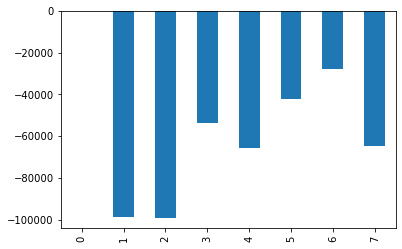

In [59]:
pd.Series(ssd).diff().plot(kind='bar');

So here we see the differnce between the rows as :- row1-row0, row2-row1, etc.....

We can see that the difference between the row, even here we can se ethat K=7 looks best value as the difference is not that much b/w row 8 and row 7, it is 27k only compared to 100k in previous K values.

### We choose K=7 as best value for the cluster.

So once you choose that correct value of K, it's not really correct, but it's kind of your best guess.

What you can do is come back and then measure out what features are related to the clusters from the corr plot and try to gain some insights that way.